# My first ML project.

## Loading the data

In [17]:
import pandas as pd


df = pd.read_csv('https://raw.githubusercontent.com/dataprofessor/data/refs/heads/master/delaney_solubility_with_descriptors.csv')# df: data frame
df #printing the dataset





,MolLogP,MolWt,NumRotatableBonds,AromaticProportion,logS
0,2.59540,167.850,0.0,0.000000,-2.180
1,2.37650,133.405,0.0,0.000000,-2.000
2,2.59380,167.850,1.0,0.000000,-1.740
3,2.02890,133.405,1.0,0.000000,-1.480
4,2.91890,187.375,1.0,0.000000,-3.040
...,...,...,...,...,...
1139,1.98820,287.343,8.0,0.000000,1.144
1140,3.42130,286.114,2.0,0.333333,-4.925
1141,3.60960,308.333,4.0,0.695652,-3.893
1142,2.56214,354.815,3.0,0.521739,-3.790


## Data preparation

### Data separation of x and y

In [18]:
# To seperate and assign the data to x and y we use the 'column name'
y = df['logS']
# y

# axis refers if we are droping a row or column, i.e if we are dropping a column then we put axis=1 and if row then axis = 0, to delete row we must give index
# x = df.drop(['logS','MolWt'], axis=1) -> DROPPING MULTIPLE TABLES
x = df.drop('logS', axis=1)
x

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
0,2.59540,167.850,0.0,0.000000
1,2.37650,133.405,0.0,0.000000
2,2.59380,167.850,1.0,0.000000
3,2.02890,133.405,1.0,0.000000
4,2.91890,187.375,1.0,0.000000
...,...,...,...,...
1139,1.98820,287.343,8.0,0.000000
1140,3.42130,286.114,2.0,0.333333
1141,3.60960,308.333,4.0,0.695652
1142,2.56214,354.815,3.0,0.521739


### Data splitting

In [20]:
from sklearn.model_selection import train_test_split
#For random_state a fixed integer value (e.g., 100, 42, 0, 1234) ensures that the same random split occurs every time you run the code.If it is set to none every time we get different splits of dataset we run
#test_size = 0.2 means that 20% of the x is assigned to testing set and 80% is assigned to training of the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)
x_test

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
822,2.91000,172.268,7.0,0.000000
118,7.27400,360.882,1.0,0.666667
347,1.94040,145.161,0.0,0.909091
1123,1.98640,119.378,0.0,0.000000
924,1.70062,108.140,0.0,0.750000
...,...,...,...,...
1114,1.76210,478.513,4.0,0.000000
427,6.32820,276.338,0.0,1.000000
711,0.04430,218.205,5.0,0.000000
4,2.91890,187.375,1.0,0.000000


In [21]:
x_train

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
107,3.14280,112.216,5.0,0.000000
378,-2.07850,142.070,0.0,0.000000
529,-0.47730,168.152,0.0,0.000000
546,-0.86740,154.125,0.0,0.000000
320,1.62150,100.161,2.0,0.000000
...,...,...,...,...
802,3.00254,250.301,1.0,0.842105
53,2.13860,82.146,3.0,0.000000
350,5.76304,256.348,0.0,0.900000
79,3.89960,186.339,10.0,0.000000


## Model Building

### Linear Regression

#### Training the model

In [22]:
from sklearn.linear_model import LinearRegression

# Assign the model to a reference(lr)
lr = LinearRegression()

#Train the model with the training dataset
lr.fit(x_train,y_train)


LinearRegression()

#### Applying the model to make the prediction

In [23]:
# Making the model to predit output by giving the training set (x_train) input
y_train_pred = lr.predict(x_train)

# Making the model to predit output by giving the testing set (x_test) input
y_test_pred = lr.predict(x_test)

#### Evaluate model performance

In [24]:
from sklearn.metrics import mean_squared_error, r2_score
    
# mean_squared_error(y_true, y_pred) → Measures how far predicted values are from actual values. 
# r2_score(y_true, y_pred) → Measures how well the model explains the variability in the data.

train_mse = mean_squared_error(y_train,y_train_pred)
train_r2_score = r2_score(y_train,y_train_pred)*100

test_mse = mean_squared_error(y_test,y_test_pred)
test_r2_score = r2_score(y_test,y_test_pred)*100

# print(f"MSE (Train): {train_mse}")
# print(f"R2  (Train): {train_r2_score*100}%")
# print(" ")
# print(f"MSE (Test) : {test_mse}")
# print(f"R2. (Test) : {test_r2_score*100}%")

#Instead of printing the result, we can create a dataframe 
lr_result = pd.DataFrame(['Linear Regression',train_mse,train_r2_score,test_mse,test_r2_score]).transpose()
lr_result.columns=['Method','MSE (Train)','R2 (Train)','MSE (Test)','R2 (Test)']
lr_result

,Method,MSE (Train),R2 (Train),MSE (Test),R2 (Test)
0,Linear Regression,1.007536,76.450518,1.020695,78.916162


### Random Forest

In [25]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(max_depth=6, random_state=100)
rf.fit(x_train,y_train)

RandomForestRegressor(max_depth=6, random_state=100)

In [26]:
# Making the model to predit output by giving the training set (x_train) input
y_train_pred_rf = rf.predict(x_train)

# Making the model to predit output by giving the testing set (x_test) input
y_test_pred_rf = rf.predict(x_test)

In [27]:
from sklearn.metrics import mean_squared_error, r2_score

train_mse_rf = mean_squared_error(y_train,y_train_pred_rf)
train_r2_score_rf = r2_score(y_train,y_train_pred_rf)*100

test_mse_rf = mean_squared_error(y_test,y_test_pred_rf)
test_r2_score_rf = r2_score(y_test,y_test_pred_rf)*100

#Instead of printing the result, we can create a dataframe 
rf_result = pd.DataFrame(['Random Forest Regression',train_mse_rf,train_r2_score_rf,test_mse_rf,test_r2_score_rf]).transpose()
rf_result.columns=['Method','MSE (Train)','R2 (Train)','MSE (Test)','R2 (Test)']
rf_result

,Method,MSE (Train),R2 (Train),MSE (Test),R2 (Test)
0,Random Forest Regression,0.328703,92.317106,0.706427,85.407789


### Model Comparison

In [32]:
models_result = pd.concat([lr_result,rf_result])
# models_result.reset_index(drop=True)
models_result

,Method,MSE (Train),R2 (Train),MSE (Test),R2 (Test)
0,Linear Regression,1.007536,76.450518,1.020695,78.916162
0,Random Forest Regression,0.328703,92.317106,0.706427,85.407789


## Data visualization

TypeError: 'str' object is not callable

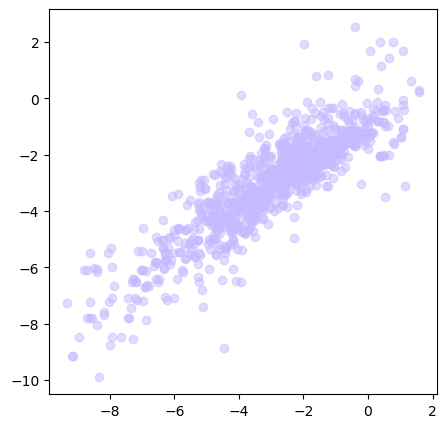

In [29]:
import matplotlib.pyplot as plt

#Here we are gonna scatter the data , that is we are gonna assign what is x and y axis and the data will be scatterd on the graph
plt.figure(figsize=(5,5))
plt.scatter(x = y_train, y = y_train_pred, c="#C5BAFF",alpha=0.5)
# plt.scatter(x = y_test, y = y_test_pred, c="#C5BAFF",alpha=0.5)
plt.xlabel('Actual logS')
plt.ylabel('Predicted logS')
plt.plot()

TypeError: 'str' object is not callable

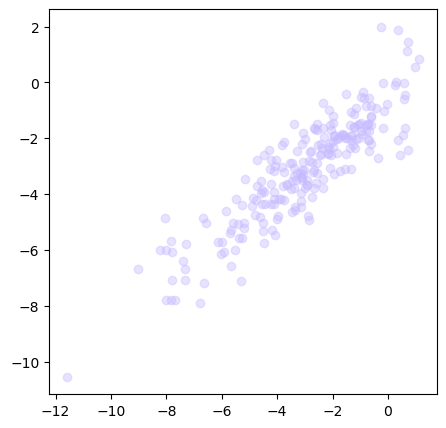

In [30]:
plt.figure(figsize=(5,5))
# plt.scatter(x = y_train, y = y_train_pred, c="#C5BAFF",alpha=0.5)
plt.scatter(x = y_test, y = y_test_pred, c="#C5BAFF",alpha=0.4)
plt.xlabel('Actual logS')
plt.ylabel('Predicted logS')
plt.plot()

## Final model that takes user input

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Load the dataset
df = pd.read_csv('https://raw.githubusercontent.com/dataprofessor/data/refs/heads/master/delaney_solubility_with_descriptors.csv')

# Separate features and target variable
y = df['logS']
x = df.drop('logS', axis=1)

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(x_train, y_train)

# Function to take user input and predict
def predict_from_input():
    print("Enter values for the following features:")
    user_data = []
    for col in x.columns:
        value = float(input(f"{col}: "))
        user_data.append(value)
    
    user_df = pd.DataFrame([user_data], columns=x.columns)
    prediction = model.predict(user_df)
    print(f"Predicted logS value: {prediction[0]}")

# Call the function to take user input and predict
if __name__ == "__main__":
    predict_from_input()


In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/dataprofessor/data/refs/heads/master/delaney_solubility_with_descriptors.csv')


In [3]:
data

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion,logS
0,2.59540,167.850,0.0,0.000000,-2.180
1,2.37650,133.405,0.0,0.000000,-2.000
2,2.59380,167.850,1.0,0.000000,-1.740
3,2.02890,133.405,1.0,0.000000,-1.480
4,2.91890,187.375,1.0,0.000000,-3.040
...,...,...,...,...,...
1139,1.98820,287.343,8.0,0.000000,1.144
1140,3.42130,286.114,2.0,0.333333,-4.925
1141,3.60960,308.333,4.0,0.695652,-3.893
1142,2.56214,354.815,3.0,0.521739,-3.790


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1144 entries, 0 to 1143
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   MolLogP             1144 non-null   float64
 1   MolWt               1144 non-null   float64
 2   NumRotatableBonds   1144 non-null   float64
 3   AromaticProportion  1144 non-null   float64
 4   logS                1144 non-null   float64
dtypes: float64(5)
memory usage: 44.8 KB


In [6]:
y = data['logS']

In [8]:
x = data.drop('logS',axis=1)
x

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
0,2.59540,167.850,0.0,0.000000
1,2.37650,133.405,0.0,0.000000
2,2.59380,167.850,1.0,0.000000
3,2.02890,133.405,1.0,0.000000
4,2.91890,187.375,1.0,0.000000
...,...,...,...,...
1139,1.98820,287.343,8.0,0.000000
1140,3.42130,286.114,2.0,0.333333
1141,3.60960,308.333,4.0,0.695652
1142,2.56214,354.815,3.0,0.521739


In [12]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.2, random_state=100)

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error

linearRegModel = LinearRegression()
linearRegModel.fit(x_train,y_train)
y_train_pred = linearRegModel.predict(x_trian)
y_test_pred = linearRegModel.predict(x_test)
r=r2_score(y_train,y_train_pred)

In [14]:
r

0.7645051774663391

In [15]:
linearRegModel.score(x_train,y_train)

0.7645051774663391

In [18]:
a=1
b=23
c=65
res = pd.DataFrame(['hello kitty',a,b,c]).transpose()
res.columns=['name','vol','DC','HPS']
res

,name,vol,DC,HPS
0,hello kitty,1,23,65


TypeError: 'str' object is not callable

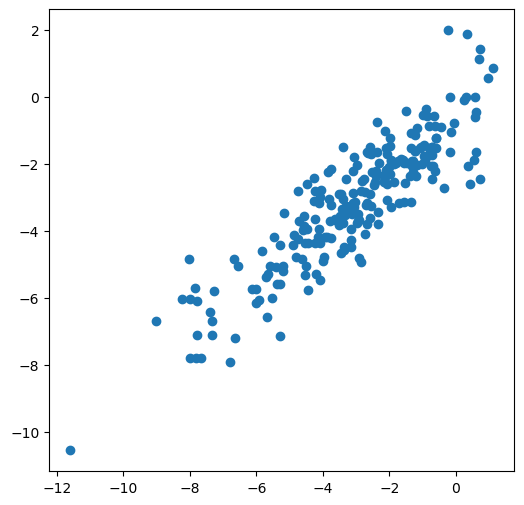

In [28]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,6))
plt.scatter(x=y_test, y = y_test_pred)
# plt.xlabel('actual output')
# plt.ylabel('predicted output')
plt.xlabel('Actual logS')
plt.ylabel('Predicted logS')
plt.plot()

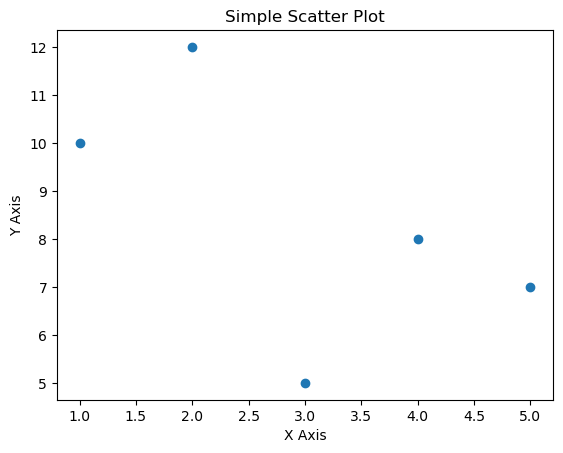

In [32]:
import matplotlib.pyplot as plt

# Sample data
x = [1, 2, 3, 4, 5]
y = [10, 12, 5, 8, 7]

# Create scatter plot
plt.scatter(x, y)


# Add labels and title
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.title('Simple Scatter Plot')

# Show plot
plt.show()


